# Initial Three Graphs - ACLR
## Group Members: Ethan, Alieen, Vinith

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('aclr_cleaned.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,record_id,redcap_event_name,sex_dashboard,graft_dashboard2,med_meniscus,lat_meniscus,lat_stab,physis,visit_sex,visit_graft,...,lsi_flex_mvic_60,acl_ext_isok_60,con_ext_isok_60,lsi_ext_isok_60,acl_flex_isok_60,con_flex_isok_60,lsi_flex_isok_60,strength_testing_complete,rts,rts_tss
0,1,baseline_arm_1,Male,Other,1.0,1.0,1.0,0.0,Not Reported,BTB autograft,...,80.21,1.61,2.23,73.80,1.05,1.22,90.00,2.0,3.0,11.0
1,1,visit_1_arm_1,Not Reported,BTB autograft,1.0,1.0,1.0,0.0,Male,Other,...,80.21,2.57,2.92,87.86,1.50,1.45,103.32,2.0,3.0,11.0
2,1,long_term_outcomes_arm_1,Not Reported,BTB autograft,1.0,1.0,1.0,0.0,Not Reported,BTB autograft,...,80.21,1.61,2.23,73.80,1.05,1.22,90.00,2.0,3.0,70.0
3,2,baseline_arm_1,Female,HS autograft,1.0,3.0,1.0,0.0,Not Reported,BTB autograft,...,80.21,1.61,2.23,73.80,1.05,1.22,90.00,2.0,3.0,11.0
4,2,visit_1_arm_1,Not Reported,BTB autograft,1.0,1.0,1.0,0.0,Female,HS autograft,...,80.21,0.97,2.16,45.00,0.88,1.20,72.98,2.0,3.0,11.0


# How does recovery metrics change (KOOS self reported outcome) in the 9 post-surgery months?

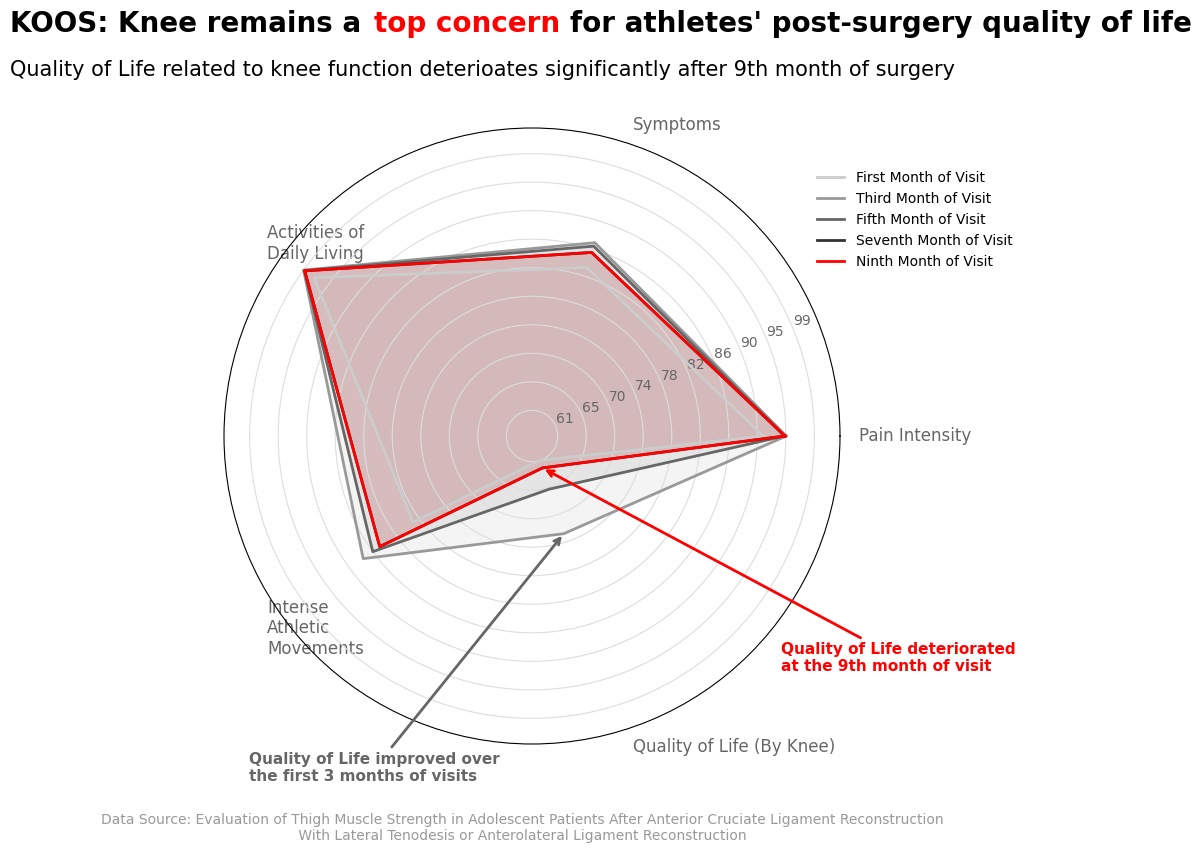

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# aggregate together the evaluative metrics as well as the visit sessions
koos_metrics = ['koos_pain', 'koos_sx', 'koos_adl', 'koos_sport', 'koos_qol']
visits = ['visit_1_arm_1', 'visit_3_arm_1', 'visit_5_arm_1', 'visit_7_arm_1', 'visit_9_arm_1']

# calculating the visit-wise averages of each metric
koos_avg = (df.groupby('redcap_event_name')[koos_metrics].mean().loc[visits])

# finding te overall min and max across all metrics to define the y-axis range
min_value = koos_avg.min().min()
max_value = koos_avg.max().max()
margin_value = (max_value - min_value) * 0.1

# calculating the angle and mapping of the radar chart scaffolding
N = len(koos_metrics)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# format and create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# set axis range based on the margin calculations derived above
ax.set_ylim([min_value - margin_value, max_value + margin_value])

# draw the radar lines for each visit
colors = ['#CCCCCC', '#999999', '#666666','#333333','#FF0000']
for i in range(len(visits)):
    visit = visits[i]
    color = colors[i]
    vals = koos_avg.loc[visit].tolist()
    vals.append(vals[0])

    ax.plot(angles, vals, label=visit, color=color, linewidth=2)
    ax.fill(angles, vals, color=color, alpha=0.1)

# create labels for each metrics, format colors and gridlines
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Pain Intensity', 'Symptoms', 'Activities of\nDaily Living', 'Intense\nAthletic\nMovements', 'Quality of Life (By Knee)'],ha='left',fontsize=12, color='#333333')
ax.tick_params(colors='#666666')
ax.yaxis.grid(True, color='#DDDDDD', linewidth=0.8)
ax.xaxis.grid(False)

# format y-axis ticks and gridlines
ticks_level = np.linspace(min_value, max_value, 10)
ax.set_yticks(ticks_level)
ax.set_yticklabels(f"{x:.0f}" for x in ticks_level)
ax.yaxis.grid(True, color ='#DDDDDD', linewidth=0.8)

# create titles and highlight key words
fig.suptitle("", y=1)
fig.text(-0.14, 1, 'KOOS: Knee remains a',fontsize=20, fontweight='bold', ha='left')
fig.text(0.315, 1, 'top concern', fontsize=20, fontweight='bold', ha='left', color='#FF0000')
fig.text(0.56, 1, 'for athletes\' post-surgery quality of life', fontsize=20, fontweight='bold', ha='left')

# create subtitle
fig.text(-0.14,0.945,'Quality of Life related to knee function deterioates significantly after 9th month of surgery', fontsize=15, ha='left')

# create custom legend
x, y = ax.get_legend_handles_labels()
legend_labels = ['First Month of Visit', 'Third Month of Visit', 'Fifth Month of Visit', 'Seventh Month of Visit', 'Ninth Month of Visit']
ax.legend(x, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 0.95),frameon=False, fontsize=10)

# create data source footer
fig.text(0.5, -0.01,"Data Source: Evaluation of Thigh Muscle Strength in Adolescent Patients After Anterior Cruciate Ligament Reconstruction\n With Lateral Tenodesis or Anterolateral Ligament Reconstruction ",fontsize=10, ha='center', color='#999999')

# calculate angles and length of the arrows for annotation
red_index = koos_metrics.index('koos_qol')
qol_angle = angles[red_index]
qol_value = koos_avg.loc['visit_9_arm_1', 'koos_qol']

# create annotations for significant deviations in the radar chart to highlight a story
qol_initial_value = koos_avg.loc['visit_3_arm_1', 'koos_qol']
ax.annotate("Quality of Life improved over\nthe first 3 months of visits", xy=(qol_angle, qol_initial_value), xytext=(qol_angle - 1, qol_initial_value + 50),arrowprops=dict(arrowstyle='->', color='#666666', lw=2),color='#666666',fontsize=11, fontweight='bold')

ax.annotate("Quality of Life deteriorated\nat the 9th month of visit",xy=(qol_angle, qol_value), xytext=(qol_angle + 0.5, qol_value + 45),arrowprops=dict(arrowstyle='->', color='red', lw=2),color='red',fontsize=11,fontweight='bold')

#plt.tight_layout()
plt.savefig('Radar Chart.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


This radar chart aims to visualize how the self reported evaluative metrics change over the course of a post-surgery 9 month journey of an athlete.

The purpose of this graph is to see whether recovery is actually happening to each athlete during their post surgery journey or are they still suffering from certain metrics like pain.

We used redcap event name to illustrate a temporal sense of the change in metrics, given that the dataset provides a sequential categories of time of visit.

The resulted graph tells us that, despite atheletes reporting a recovery at the intial stages of the visits. As they come back after the 3rd month of visit, they're evaluation starts to deteriorate drastically. This is shown by the deterioration of the quality of life, where the last visit (the 9th month of visit) reflects a significant detraction of the quality of life at the 3rd month. Same goes for the Intense athletic movement metric, which, although not as drastic as the Quality of Life, also deteriorated at the last month of visit. This series of observations tells us that contrary to what one would imagine, the effect of the surgery doesn't seem to be sustainable, or at least not as sustainable as one would thought especially for athletes, who would be likely returning to athletic training after the surgery without the priviledge of enjoying a year-long recovery timeline

# How does performing ACLR only and ACLR + Additional procedures differ in post-surgery recovery?

additional_procedures_flag
False    22820
True      9656
Name: count, dtype: int64


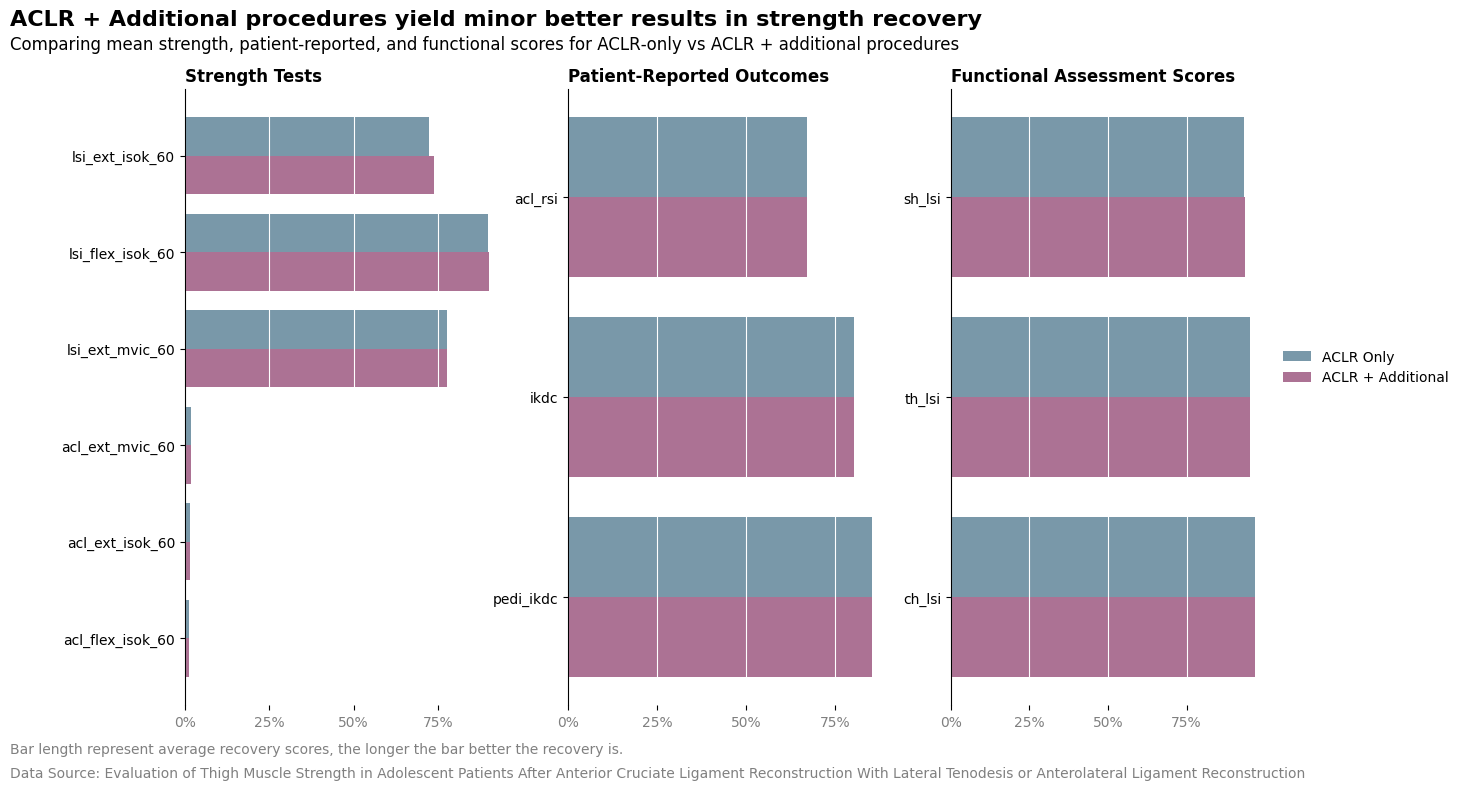

In [63]:
# Read and join the raw dataset together with the imputed dataset
df_raw = pd.read_csv('aclr data(in).csv')

# create two groups of data: one that only undergone ACLR and another undergoing ACLR + additional procedures
df_raw['additional_procedures_flag'] = (df_raw[['med_meniscus','lat_meniscus','lat_stab']].notna().any(axis=1))

# merging together the column from the the raw dataset with the imputed cleaned dataset
df_merged = pd.merge(df,df_raw[['record_id','additional_procedures_flag']],on='record_id',how='left')

# sanity check: whether both groups contains entries
print(df_merged['additional_procedures_flag'].value_counts())

# create groups of different evaluative metrics
strength_tests    = ['acl_flex_isok_60','acl_ext_isok_60','acl_ext_mvic_60','lsi_ext_mvic_60','lsi_flex_isok_60','lsi_ext_isok_60']
pr_outcomes      = ['pedi_ikdc','ikdc','acl_rsi']
functional_scores = ['ch_lsi','th_lsi','sh_lsi']

# calculate the mean value for each group for each evaluation metric
mean_only_strength = df_merged[df_merged['additional_procedures_flag']==False][strength_tests].mean()
mean_addl_strength = df_merged[df_merged['additional_procedures_flag']==True][strength_tests].mean()

mean_only_pr = df_merged[df_merged['additional_procedures_flag']==False][pr_outcomes].mean()
mean_addl_pr = df_merged[df_merged['additional_procedures_flag']==True][pr_outcomes].mean()

mean_only_func = df_merged[df_merged['additional_procedures_flag']==False][functional_scores].mean()
mean_addl_func = df_merged[df_merged['additional_procedures_flag']==True][functional_scores].mean()

# pre-configuration of chart colors and bar width
colors= ['#7998A9', '#AC7294']
bar_width = 0.4

plt.figure(figsize=(14, 8))
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# create main titles, subtitles, and data source footers
plt.suptitle("ACLR + Additional procedures yield minor better results in strength recovery",fontsize=16, fontweight='bold', x=0.0, ha='left')
plt.figtext(0.0, 0.93,"Comparing mean strength, patient‑reported, and functional scores for ACLR‑only vs ACLR + additional procedures",fontsize=12, ha='left')
plt.figtext(0.0, 0.05, "Bar length represent average recovery scores, the longer the bar better the recovery is.", fontsize=10, color='grey', ha='left')
plt.figtext(0.0, 0.02, "Data Source: Evaluation of Thigh Muscle Strength in Adolescent Patients After Anterior Cruciate Ligament Reconstruction With Lateral Tenodesis or Anterolateral Ligament Reconstruction", fontsize=10, color='grey', ha='left')

# create horizontal barcharts for strength tests
ax1 = plt.subplot(1, 3, 1)
y1 = np.arange(len(strength_tests))
ax1.barh(y1 + bar_width/2, mean_only_strength.values, bar_width, color=colors[0], label='ACLR‑Only')
ax1.barh(y1 - bar_width/2, mean_addl_strength.values, bar_width, color=colors[1], label='ACLR + Additional')
ax1.set_yticks(y1)
ax1.set_yticklabels(strength_tests, fontsize=10)
ax1.set_title('Strength Tests', fontsize=12, fontweight='bold', loc='left')
ax1.set_xticks([0,25,50,75])
ax1.set_xticklabels(['0%','25%','50%','75%'], alpha=0.5)
ax1.grid(axis='x', linestyle='-', color='white', alpha=1)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# create horizontal barcharts for patient reported outcomes
ax2 = plt.subplot(1, 3, 2)
y2 = np.arange(len(pr_outcomes))
ax2.barh(y2 + bar_width/2, mean_only_pr.values, bar_width, color=colors[0], label='ACLR Only')
ax2.barh(y2 - bar_width/2, mean_addl_pr.values, bar_width, color=colors[1], label='ACLR + Additional')
ax2.set_yticks(y2)
ax2.set_yticklabels(pr_outcomes, fontsize=10)
ax2.set_title('Patient‑Reported Outcomes', fontsize=12, fontweight='bold', loc='left')
ax2.set_xticks([0,25,50,75])
ax2.set_xticklabels(['0%','25%','50%','75%'], alpha=0.5)
ax2.grid(axis='x', linestyle='-', color='white', alpha=1)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# create horizontal barcharts for functional assessment scores
ax3 = plt.subplot(1, 3, 3)
y3 = np.arange(len(functional_scores))
ax3.barh(y3 + bar_width/2, mean_only_func.values, bar_width, color=colors[0], label='ACLR Only')
ax3.barh(y3 - bar_width/2, mean_addl_func.values, bar_width, color=colors[1], label='ACLR + Additional')
ax3.set_yticks(y3)
ax3.set_yticklabels(functional_scores, fontsize=10)
ax3.set_title('Functional Assessment Scores', fontsize=12, fontweight='bold', loc='left')
ax3.set_xticks([0,25,50,75])
ax3.set_xticklabels(['0%','25%','50%','75%'], alpha=0.5)
ax3.grid(axis='x', linestyle='-', color='white', alpha=1)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax3.legend(loc='lower right', bbox_to_anchor=(1.6, 0.5) ,frameon=False)
plt.show()

The grouped horizontal bar graph is intended to showcase how performing the two types of procedures could yield different outcomes across the three major categories of recovery evaluation metrics (strength tests, patient's self reported outcomes, and functional assessment scores)

This is in part also inspired by the research paper that we read earlier about how performing ACLR alone technically yields better recovery results, whereas if additional procedures (such as LET) are applied to it, it would worsen recovery results.

Due to the vast volume of missing values in this dataset, we had to impute data for the group that underwent ACLR + Additional. (We created a new column called additional procedures flag that returns a false if only ALCR is performed and returns true if ACLR is performed alongside with any of the three additional procedures)

However, it turns out that since the additional procedures group originally had only null values in almost all of their recovery metrics. This meant that by imputing data from the ACLR alone group by the mean, we're essentially just copying the identical mean from one group to another. That's why you couldsee how for patient reported outcomes and functional assessments, the recovery percentage is almost the same.

Had the dataset been enriched further, the outcome would've been much more meaningful with imputation. I'd imagine that it would be the same if we are to use machine learning to predict missing values because overall we're still basing our predictions on the ACLR group and mapping it onto the additional procedures group.

Hence unless there's a major issue with our method of imputation or method of classifying ACLR groups vs Additional procedures groups, it would be a pity in a sense that we could not prove or disprove the findings from the research paper adequately.

# What does the KOOS self reported Pain Recovery Trajectory look like?

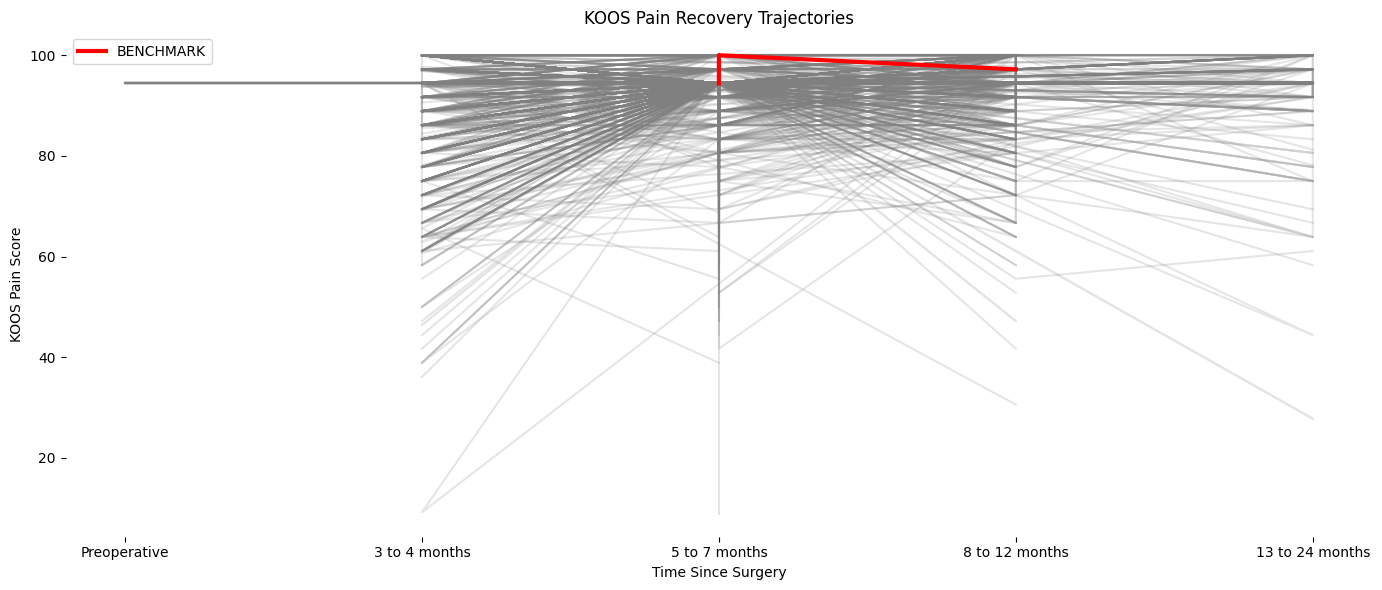

In [68]:
#First we need to map the tss_dashboard features to a specifc number (us attempting to make it into a chronological timeline, since it wasn't ordered before )

tss_mapping = {
    "Preoperative": 0,
    "3 to 4 months": 1,
    "5 to 7 months": 2,
    "8 to 12 months": 3,
    "13 to 24 months": 4,
}

# Need to make a new column that connects the order of the tss_maping and the tss_dashboard
df['time_ordered'] = df['tss_dashboard'].map(tss_mapping)

# Set the x-axis labels in correct order
labels = [t for t, a in sorted(tss_mapping.items(), key=lambda x: x[1])]


# MAKING THE GRAPH



# Plotting figure dimensions
plt.figure(figsize=(14, 6))
# Ploting the patients as gray- but interested in a target patient as red (we choose a random record_id number)
# This runs a conditional that makes all other record_id as gray ( trying to focus on "benchmark")
for pat, group in df.groupby('record_id'):
    if pat != 101: # we choose a random record_id number as a benchmark
        plt.plot(group['time_ordered'], group['koos_pain'], color='gray', alpha=0.2)

#  NOW WE Plot the target ( benchmark) record_id ( "patient")
ben = df[df['record_id'] == 101] # this makes a new column that has information on our benchmark patient
plt.plot(ben['time_ordered'], ben['koos_pain'], color='red', linewidth=3, label='BENCHMARK')




# Format the x-axis with correct labels
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.xlabel('Time Since Surgery')
plt.ylabel('KOOS Pain Score')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title('KOOS Pain Recovery Trajectories')
plt.legend()
plt.tight_layout()
plt.show()

We envisioned a graph/ dashboard that would be animated/interactive. As time ( in our case the time since surgery time stamps) progresses, we wanted to see how a patient with unique metrics/characteristics would compare to the benchmark/target. We attempted to simulate this by grouping the record_id and the koos_pain and measuring the "patient's koos_pain score over tss timeline". We hope to project this graph onto an interactive dashboard, but making this graph definitely gave us a working model/idea to experiment with. For our benchmark record_id, for right now we are just choosing a random record_id to simulate the goal of our dashboard. In our finalized dashboard/graphs, we plan on making the benchmark the average KOOS Pain at the time ( expected) and we'll be inputting unique patients' metrics ( KOOS Pain) and assessing their percentile rankings from the average ( if that makes sense). To reiterate, a keynote to make is that we plan on mirroring this similar code onto the different assessment metrics we expressed interest in ( from this dataset).